In [4]:
from pymongo import MongoClient

# 네트워크 연결 규칙 : protocol://ip:port/path
client = MongoClient('mongodb://192.168.0.50:27017/')
db_name = client["DB_SGMN"]
collection = db_name["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]

In [5]:
from konlpy.tag import Okt
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:

# MongoDB에서 데이터 가져오기
data = list(collection.find())

# DataFrame으로 변환
df = pd.DataFrame(data)

# 날짜 데이터를 주 단위로 변환
df['week'] = pd.to_datetime(df['DATE']).dt.isocalendar().week

# 주 단위로 텍스트 데이터를 결합
grouped = df.groupby('week')['COMMENT'].apply(' '.join).reset_index()

okt = Okt()

/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


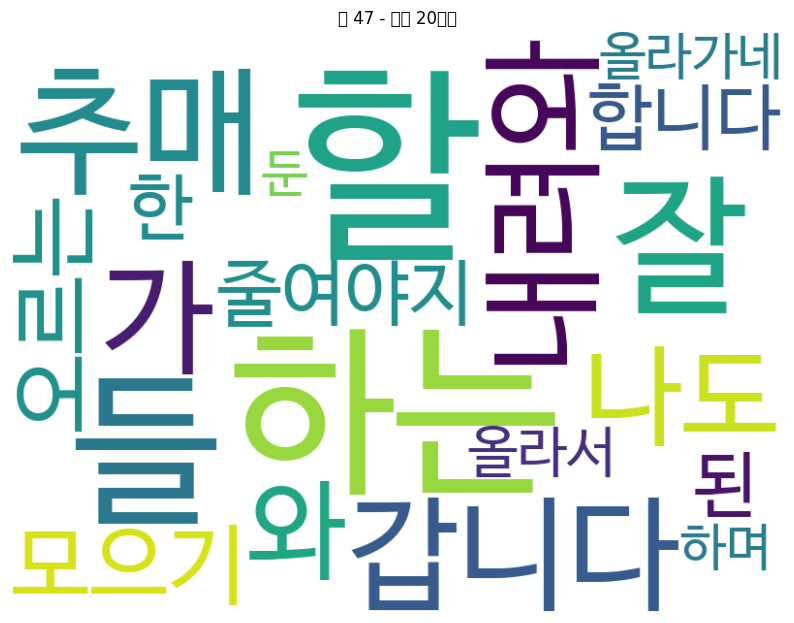

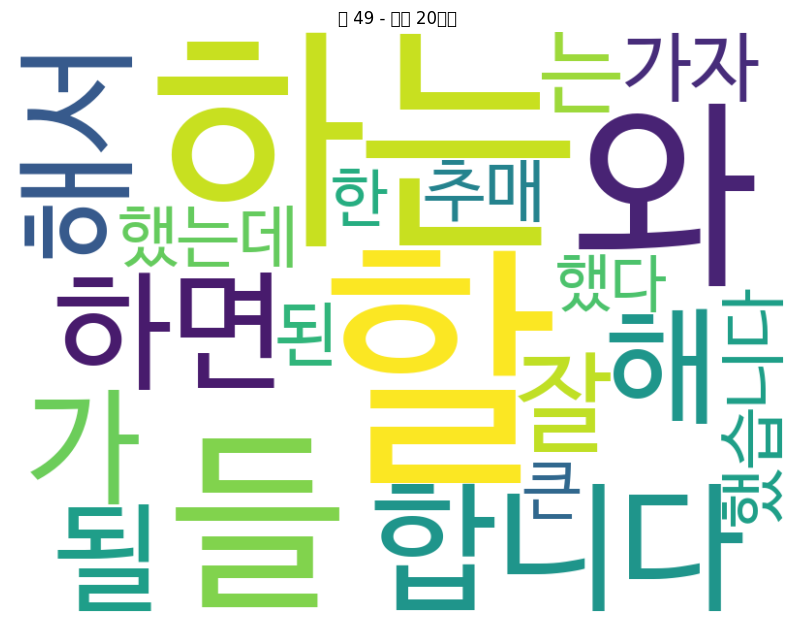

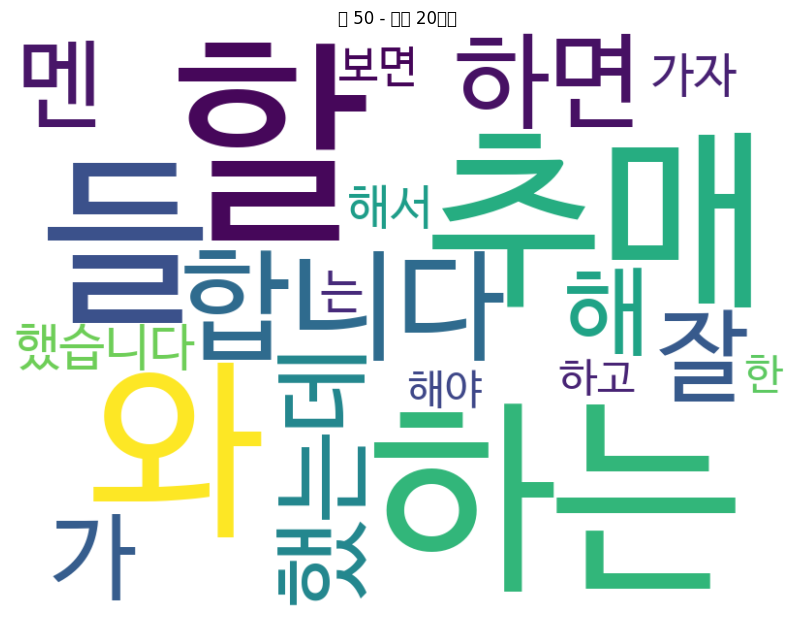

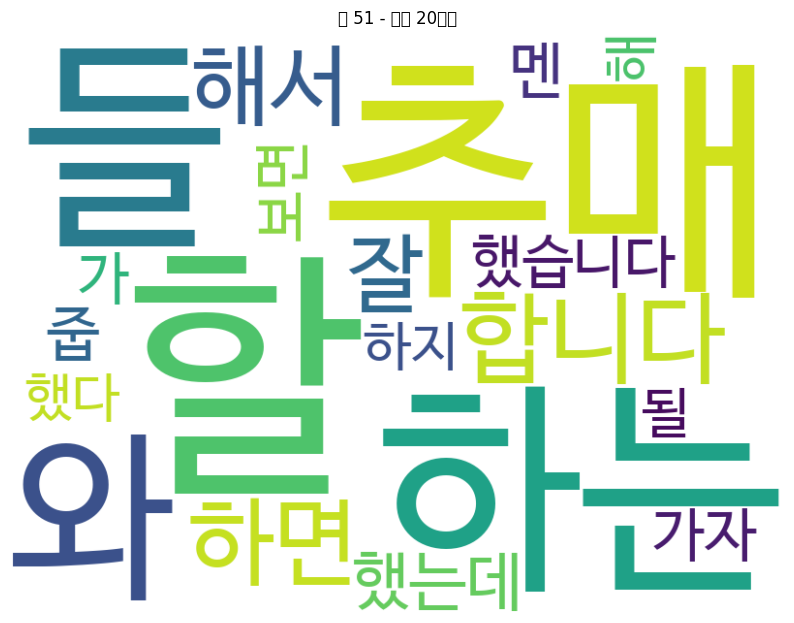

KeyboardInterrupt: 

In [7]:
for _, row in grouped.iterrows():
    week_text = row['COMMENT']
    week = row['week']
    
    # 형태소 분석
    
    verbs = [word for word, pos in okt.pos(week_text) if pos == 'Verb']
    
    # 동사 빈도 계산
    
    verb_freq = Counter(verbs).most_common(20)
    
    # 동사 빈도를 기반으로 워드클라우드 생성
    
    
    verb_wordcloud = WordCloud(
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
        width=400,
        height=300
    ).generate_from_frequencies(dict(verb_freq))
    

    # 동사 워드클라우드 표시
    plt.figure(figsize=(10, 8))
    plt.imshow(verb_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'주 {week} - 상위 20동사')
    plt.show()